# Credit Card Fraud Detection

This project aims to detect credit card fraud.

#### **Description**
This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

#### **Key features of the data:**
*   `id:` Unique identifier for each transaction
*   `V1-V28:` Anonymized features representing various transaction attributes (e.g., time, location, etc.)
*   `Amount:` The transaction amount
*   `Class:` Binary label indicating whether the transaction is fraudulent (1) or not (0)

##### **Source:**
The dataset is from: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023


#### Support for the project

* Throughout the project I've used Yann-Aël Le Borgne and Patrick Chong github repository for support and insight on how to approach this problem in a good way. So definetly check their repo out.Link: https://github.com/Fraud-Detection-Handbook/fraud-detection-handbook?tab=readme-ov-file
* I've also used Adrien Payong and Abdeladim Fadheli's article on the subject. You can read their article at this link: https://thepythoncode.com/article/credit-card-fraud-detection-using-sklearn-in-python


In [7]:
# Standard imports
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and exploring the data

You could use the Kaggle API for continouus updates, but it is just easier to do it manually. Therefore you could check if the data has been updated before using this. 

In [8]:
credit_df = pd.read_csv("data/creditcard_2023.csv")
credit_df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [9]:
print("Average Amount in a Fraudulent Transaction: ", credit_df[credit_df["Class"] == 1]["Amount"].mean())
print("Average Amount in a Valid Transaction: ", credit_df[credit_df["Class"] == 0]["Amount"].mean())

Average Amount in a Fraudulent Transaction:  12057.601763361063
Average Amount in a Valid Transaction:  12026.313505794627


**NOTE**
The high amount is most likely due to anonymization and confidentiality issues. Otherwise, it seems unlikely that the average amount is this high. Therefore, in a real world application this might effect the performance of the model I'll build in this notebook.

Due to the anonymization it is hard to make useful plots for insight into the data, so I've landed on just using a correlation matrix without reading to much into it.

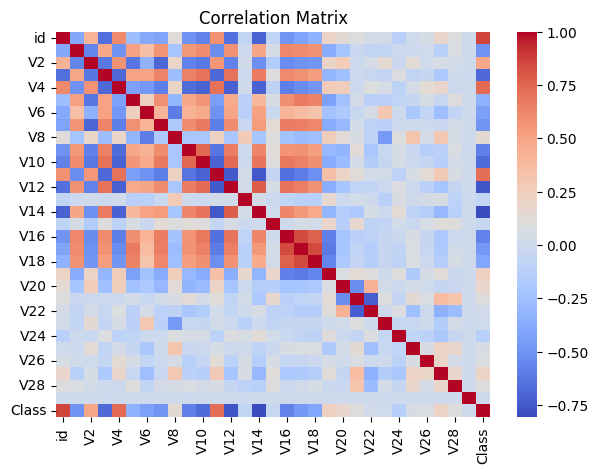

In [10]:
plt.figure(figsize=(7, 5))
sns.heatmap(credit_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix');

Judging by the correlation matrix, it seems the last 10 anonomous columns are not highly correlated to much of the data.

# Preparing the data for training

After importing the data we need to make sure there are no issues which will cause problems later on.

### First issues to tackle:
* I will drop the first column, since it is just the same as the id column
* Check for empty cells or NaN
* Check the distribution of targets (0 or 1)
* Shuffle the data
* Split into training and test sets

In [11]:
# Dropping the first column
credit_df = credit_df.set_index("id")

# Check for empty cells or NaN
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     568630 

Good, there seems to be noe empty cells. And the columns V1-V28 are already normalized.

In [12]:
class_counts = credit_df['Class'].value_counts()
print(class_counts)

Class
0    284315
1    284315
Name: count, dtype: int64


The target values are perfectly distributed as well. Now we only need to shuffle the data and split into training and test sets

In [13]:
# Shuffle the dataset
credit_df = credit_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Define the split ratio
train_ratio = 0.8
train_size = int(len(credit_df) * train_ratio)

# Split the data into training and testing sets
train_data = credit_df[:train_size]
test_data = credit_df[train_size:]

X_train = train_data.drop(columns=['Class'])
y_train = train_data['Class']
X_test = test_data.drop(columns=['Class'])
y_test = test_data['Class']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((454904, 29), (454904,), (113726, 29), (113726,))

# Building the framework

This will be the finished model, but when building this I will have tried different approaches.

## 1. Baseline model

I'll be using a baseline model as a refernce point to help me decide if the more complex models improve performance substantially. The baseline model can also highlight data issues early. This will be used as the minimum performance benchmark, and will prevent unnecessary model complexity. For this I'll be using sklearn function, but the other ones I'll build from scratch to maximize understanding and learning potential.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

# ROC-AUC score
roc_auc_baseline = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc_baseline)


Classification Report:
               precision    recall  f1-score   support

   Non-Fraud       0.95      0.98      0.96     56950
       Fraud       0.98      0.95      0.96     56776

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726

ROC-AUC Score: 0.9934758078602998


/Users/fredericstrand/Documents/python-projects/credit_fraud/credit_fraud_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2. Functions for model

### 2.1 Performance metrics

*   `Precision:` The proportion of correctly predicted positive cases out of all cases predicted as positive, indicating model reliability in positive predictions.
*   `Recall:` The proportion of actual positive cases that the model correctly identifies, measuring sensitivity to true positives.
*   `F1-score:` The harmonic mean of precision and recall, balancing both metrics to handle class imbalance effectively.
*   `AUC:` Measures the model’s overall classification performance by calculating the True Positive Rate (TPR) and False Positive Rate (FPR) across thresholds, then finding the area under the ROC curve.

In [15]:
def checkanswers(y_true, y_pred):
    TP = FP = TN = FN = 0
    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            TP += 1
        elif true == 0 and pred == 0:
            TN += 1
        elif true == 0 and pred == 1:
            FP += 1
        elif true == 1 and pred == 0:
            FN += 1
    cm = np.array([[TN, FP], [FN, TP]])
    return cm

In [16]:
def precision_recall_f1(cm):

    cm = calculate_confusion_matrix(y_true, y_pred)
    
    TP = cm[1, 1]  # True Positives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives
    
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0
    
    return precision, recall, f1_score

def roc_curve_and_auc(y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    tpr_list, fpr_list = zip(*[
        (
            sum((y_pred := (y_scores >= t)) & y_true) / sum(y_true),
            sum(y_pred & ~y_true) / sum(~y_true)
        )
        for t in thresholds
    ])
    return np.trapz(tpr_list, fpr_list)


### 2.2 Building the model

I'll use a hybrid model with an `Autoencoder` and a standard neural network `(DNN)` to detect creditcard fraud. The Autoencoder will flag high-reconstruction-error transactions as potential fraud. Then use the DNN on flagged transactions for further classification refinement.

#### Activation and Loss functions :

In [17]:
# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Loss functions
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true)*np.log(1 - y_pred))

Now we want to build the autoencoder model. EXPLAINATION:::::

In [30]:
class Autoencoder:
    def __init__(self, input_dim, hidden_dims):
        self.weights = []
        self.biases = []

        # Encoder layers
        prev_dim = input_dim
        for h_dim in hidden_dims:
            self.weights.append(np.random.randn(prev_dim, h_dim) * 0.01)
            self.biases.append(np.zeros((1, h_dim)))
            prev_dim = h_dim

        # Decoder layers
        for h_dim in reversed(hidden_dims[:-1]):
            self.weights.append(np.random.randn(prev_dim, h_dim) * 0.01)
            self.biases.append(np.zeros((1, h_dim)))
            prev_dim = h_dim
        
        # Output layer
        self.weights.append(np.random.randn(prev_dim, input_dim) * 0.01)
        self.biases.append(np.zeros((1, input_dim)))

    def forward(self, x):
        self.activations = [x]
        for w, b in zip(self.weights, self.biases):
            x = relu(np.dot(x, w) + b)
            self.activations.append(x)
        return x

    def backward(self, x, learning_rate):
        # Calculate reconstruction error gradient
        delta = (self.activations[-1] - x) * relu_derivative(self.activations[-1])
        for i in range(len(self.weights) -1, -1, -1):
            grad_w = np.dot(self.activations[i].T, delta) / x.shape[0]
            grad_b = np.mean(delta, axis=0, keepdims=True)
            delta = np.dot(delta, self.weights[i].T) * relu_derivative(self.activations[i])
            self.weights[i] -= learning_rate * grad_w
            self.biases[i] -= learning_rate * grad_b

    def train(self, x, epochs, learning_rate):
        x = np.array(x)
        for epoch in range(epochs):
            output = self.forward(x)
            loss = mean_squared_error(x, output)
            self.backward(x, learning_rate)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

        return loss

The Deep Neural Network is somewhat standard

In [23]:
class DNN:
    def __init__(self, input_dim, hidden_dims):
        self.weights = []
        self.biases = []

        # Hidden Layers
        prev_dim = input_dim
        for h_dim in hidden_dims:
            self.weights.append(np.random.randn(prev_dim, h_dim) * 0.01)
            self.biases.append(np.zeros((1, h_dim)))
            prev_dim = h_dim

        # Output layer
        self.weights.append(np.random.randn(prev_dim, input_dim) * 0.01)
        self.biases.append(np.zeros((1, input_dim)))

    def forward(self, x):
        self.activations = [x]
        for w, b in zip(self.weights[:-1], self.biases[:-1]):
            x = relu(np.dot(x, w) + b)
            self.activations.append(x)
        x = sigmoid(np.dot(x, self.weights[-1] + self.biases[-1]))
        self.activations.append(x)
        return x

    def backward(self, y_true, y_pred, learning_rate):
        delta = (y_pred - y_true) * sigmoid_derivative(self.activations[-1])
        for i in range(len(self.weights) - 1, -1, -1):
            grad_w = np.dot(self.activations[i].T, delta) / y_true.shape[0]
            grad_b = np.mean(delta, axis=0, keepdims = True)
            if i != 0:
                delta = np.dot(delta, self.weights[i].T) * relu_derivative(self.activations[i])
            self.weights[i] -= learning_rate * grad_w
            self.biases[i] -= learning_rate * grad_b

    def train(self, x, y, epochs, learning_rate):
        for epoch in range(epochs):
            y_pred = self.forward(x)
            loss = binary_cross_entropy(y, y_pred)
            self.backward(y, y_pred, learning_rate)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

        return loss

Build the hybrid model

In [24]:
class HybridModel:
    def __init__(self, autoencoder, dnn, threshold):
        self.autoencoder = autoencoder
        self.dnn = dnn
        self.threshold = threshold

    def predict(self, x):
        # First stage: Autoencoder reconstruction error
        reconstructions = self.autoencoder.forward(x)
        reconstruction_errors = np.mean((x - reconstructions) ** 2, axis=1)

        # Flag the transactions with high error
        autoencoder_flags = reconstruction_errors > self.threshold

        # Second stage: DNN for flagged transactions
        dnn_predictions = self.dnn.forward(x[autoencode_flags])

        # Final hybrid predictions
        predictions = np.zeros(x.shape[0])
        predictions[autoencoder_flags] = (dnn_predictions > 0.5).flatten()

        return predictions

Test the model

In [31]:
# Define models
autoencoder = Autoencoder(input_dim=29, hidden_dims=[30, 15])
dnn = DNN(input_dim=30, hidden_dims=[64, 32, 16, 8])

# Train models
autoencoder.train(X_train[y_train == 0], epochs=100, learning_rate=0.001)  # Only on non-fraud data
dnn.train(X_train, y_train, epochs=100, learning_rate=0.001)

# Define a threshold based on reconstruction error
reconstruction_errors = np.mean((X_train - autoencoder.forward(X_train)) ** 2, axis=1)
threshold = np.percentile(reconstruction_errors, 95)

# Initialize and use Hybrid Model
hybrid_model = HybridModel(autoencoder, dnn, threshold)
predictions = hybrid_model.predict(X_test)


Epoch 0, Loss: 6634736.085109099
Epoch 10, Loss: 6634740.698640414
Epoch 20, Loss: 6634740.698622154
Epoch 30, Loss: 6634740.698616365
Epoch 40, Loss: 6634740.698612432
Epoch 50, Loss: 6634740.698608614
Epoch 60, Loss: 6634740.698604881
Epoch 70, Loss: 6634740.698601243
Epoch 80, Loss: 6634740.698597702
Epoch 90, Loss: 6634740.698594267


ValueError: shapes (454904,29) and (30,64) not aligned: 29 (dim 1) != 30 (dim 0)